## Polynomial Regression Challenge

In [1]:
from functions import *
import pandas as pd
import seaborn as sns

Below, we will generate some synthetic data for this challenge

We have 2 continuous features, `x1` and `x2`, and a binary target `y`

In [2]:
data = generate_data(random_seed= 42)
df = pd.DataFrame(data = data, columns = ['x1', 'x2', 'y'])
print(df.shape)
df.head(3)

(1000, 3)


,x1,x2,y
0,-0.597098,0.896927,1.0
1,0.523172,-0.129884,1.0
2,-0.183970,-1.281665,0.0


<AxesSubplot: xlabel='x1', ylabel='x2'>

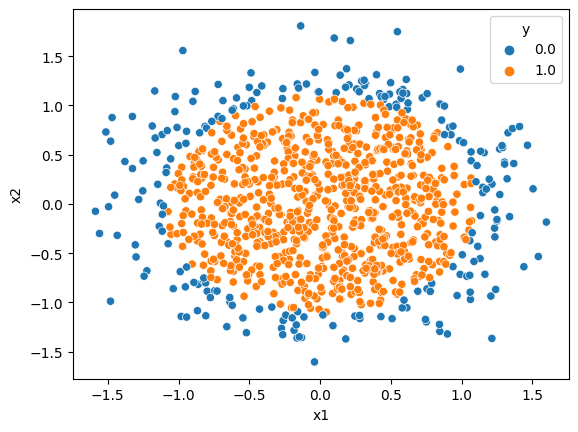

In [3]:
sns.scatterplot(x = df['x1'], y = df['x2'], hue = df['y'])

This is a binary classification problem, so we need to use an appropriate algorithm, like logistic regression. 

Looking at our data, we can see that there does appear to be a clearly defined boundary between the classes (they're not mixed up together).

However, this boundary is clearly not linear, so a basic logistic regression won't work -- we'll need to introduce polynomial features to capture this trend!

>*Note*: There are non-linear models you will encounter soon that could capture this boundary without polynomial features (i.e. a tree based model), but for now we will focus on logistic regression

### Task 1: Data Exploration

We've already looked at the relationship between the features and the target in the visualization above, but lets do some basic QA to ensure our data is suitable for modelling.

1. Look at the descriptive statistics (mean, std dev, quantiles, min, max, etc) for the variables at the target
2. Check if there are any missing values
3. Do some more EDA visualization:
    - Visualize the distribution of each variable (i.e. a histogram for continuous features, a bar plot for the target)
    - Try creating an overlapped histogram of the features to compare their histograms (hint: create two seaborn plots in the same cell, use the `alpha` parameter for transparency)
4. Look at the histograms of x1 and x2
    - Do these look like a familiar distribution? Can you perform a statistical test to check? Assume $\alpha = 0.05$

> Think ahead to your ML modelling:
> Do you think feature scaling is a necessary step here? What is the purpose of feature scaling? Make a decision whether or not to include it in your pipeline
    

### Task 2: Modelling

1. Perform a train test split on the data 
    - Remember that higher order polynomials will almost always have lower training error due to overfitting
    - We will use evaluation on the test set to decide the best model fit

2. Select an evaluation criterion
    - Our target is imbalanced, is it appropriate to use accuracy?
    - We want an overall good fit, not biased towards false positives or false negatives. Are recall/ precision appropriate?
    - What about one of the 'balanced' criteria for imbalanced data sets?

3. Try a simple logistic regression:
    - We don't expect this to work well, because no straight line can create the correct decision boundary 
    - This will act as our baseline

4. Write a function that computes your chosen metric for different degrees of PolynomialFeatures
    - Inputs should be your dataframes, and the maximum polynomial degree
    - For each degree from 1 to your max degree, fit a logistic regression model
        - (HINT: use `for i in range(max+1):`)
    - For each degree, print the degree, and the score for your chosen metric
    - The function should return the fitted model with the highest score

> (STRETCH): There is a more elegant way to do this using sklearn Pipelines, which you will learn later. Optionally, research using pipelines to tune hyperparameters like the degree parameter of PolynomialFeatures. See if you get the same result as your function  

### Task 3: Interpretation

We have created a function for you to visualize the decision boundary created by your model. We already imported it at the top of this notebook.

The function call looks like `plot_boundaries(X, y, degree)`, where X is your features dataframe (i.e. X_train), your target series (i.e. y_train), and degree is the integer of the maximum polynomial degree

1. Experiment with this function with different polynomial degrees
    - What is the smallest degree that seems to effectively capture the decision boundary?
    - Does this match with your findings from the modelling step?

2. Look up the mathematical function to define a circle - we can consider this the underlying 'data generating function'
    - Is this the same degree as your best model fit?
    - Consider, in general, does it make sense to use a higher order polynomial than that which captures the actual physical process?

### Task 4: The Right Tool for the Job

Some models naturally do a better job at some tasks than others. Once we are familiar with more models, we can use our intuition as data scientists to choose the right tool for the job. 

k-Nearest Neighbors Classifier is a very simple model that considers the `k` closest examples to the prediction target in the feature space (by euclidean distance), and takes the 'vote' of these neighboring examples to make a prediction. So if 3 neighbors we class 1 and 2 were class 0, we would predict class 1 (with a probability of $\frac{3}{5}$)

(Note: k-NN can also be a regressor, where the values of the neighboring examples are simply averaged)

Unlike logisitic regression, k-NN does not model any particular mathematical function. It is a [non-parametric model](https://en.wikipedia.org/wiki/Nonparametric_statistics#:~:text=Non%2Dparametric%20models%20differ%20from,and%20not%20fixed%20in%20advance.) without a specified structure, and so can potentially fit complex decision boundaries, despite its simplicity. 

1. Try using our previous plotting function with the added argument `modeltype = 'knn'`. This model is much simpler than engineering polynomial features - does it still capture our decision boundary effectively?

> Note: If you want to investigate more with k-NN there is a `neighbors` argument in the function. By default it is set to 1.
